## Regularization & Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV

#%matplotlib inline

In [2]:
WVS2021 = pd.read_excel("C:\\Users\\Paul Squires\\Documents\\Datasets\\World Values Survey\\WVS 2021\\WVS_2021_data.xlsx")

In [3]:
#WVS2021 = pd.read_excel("G:\\Datasets\\WVS 2021\\WVS_2021_data.xlsx")

In [4]:
WVS2021.shape

(4932, 278)

In [5]:
WVS2021.head()

,row_id,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,Q_MODE,N_REGION_ISO,H_SETTLEMENT,H_URBRURAL,E_RESPINT,...,Q274,Q275,Q275R,Q279,Q285,Q286,Q287,Q288,Q289,Q290
0,1,2021,2,404,KEN,1,404030,1.0,1,1.0,...,0.0,5.0,3.0,3.0,1.0,3.0,2.0,5.0,2.0,404001.0
1,2,2021,2,404,KEN,1,404030,2.0,1,1.0,...,1.0,5.0,3.0,7.0,2.0,4.0,1.0,10.0,1.0,404006.0
2,3,2021,2,404,KEN,1,404030,4.0,1,1.0,...,0.0,3.0,2.0,1.0,2.0,2.0,5.0,5.0,2.0,404009.0
3,4,2021,2,404,KEN,1,404030,1.0,1,1.0,...,0.0,6.0,3.0,7.0,2.0,2.0,3.0,7.0,2.0,404004.0
4,5,2021,2,404,KEN,1,404013,2.0,1,1.0,...,1.0,5.0,3.0,5.0,2.0,2.0,3.0,7.0,2.0,404003.0


### Create another object (dataf) that holds the data and print the names of the object's variables (columns) and its shape.

In [6]:
dataf = WVS2021[:]
print(dataf.columns)
print(dataf.shape)

Index(['row_id', 'A_YEAR', 'A_STUDY', 'B_COUNTRY', 'B_COUNTRY_ALPHA', 'Q_MODE',
       'N_REGION_ISO', 'H_SETTLEMENT', 'H_URBRURAL', 'E_RESPINT',
       ...
       'Q274', 'Q275', 'Q275R', 'Q279', 'Q285', 'Q286', 'Q287', 'Q288', 'Q289',
       'Q290'],
      dtype='object', length=278)
(4932, 278)


### Create a dataset that includes only the variables that may be chosen for the analysis; print the variable names and shape of the dataset

In [7]:
dataf1 = dataf.iloc[:, np.r_[1,3,11:94,196:209]]
print(dataf1.columns)
print(dataf1.shape)

Index(['A_YEAR', 'B_COUNTRY', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
       'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38',
       'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48',
       'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58',
       'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'Q67', 'Q68',
       'Q69', 'Q70', 'Q71', 'Q72', 'Q73', 'Q74', 'Q75', 'Q76', 'Q77', 'Q78',
       'Q79', 'Q80', 'Q81', 'Q83', 'Q88', 'Q195', 'Q196', 'Q197', 'Q198',
       'Q199', 'Q200', 'Q201', 'Q202', 'Q203', 'Q204', 'Q205', 'Q206', 'Q207'],
      dtype='object')
(4932, 98)


### Count the total number of missing values for all columns

In [8]:
dataf1.isna().sum().sum()

4462

### Calculate the median for each variable

In [9]:
dataf1.median().head()

A_YEAR       2017.0
B_COUNTRY     840.0
Q1              1.0
Q2              2.0
Q3              2.0
dtype: float64

### Replace missing values with median (also can be replaced with mean, mode, based on the analysis)

In [10]:
dataf2 = dataf1.fillna(dataf1.median())

### Check that there are now no missing values, print the variable names and shape of the dataset.

In [11]:
print(dataf2.isna().sum().sum())   ## Count missing values
print(dataf2.shape)
print(list(dataf2.columns))

0
(4932, 98)
['A_YEAR', 'B_COUNTRY', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q69', 'Q70', 'Q71', 'Q72', 'Q73', 'Q74', 'Q75', 'Q76', 'Q77', 'Q78', 'Q79', 'Q80', 'Q81', 'Q83', 'Q88', 'Q195', 'Q196', 'Q197', 'Q198', 'Q199', 'Q200', 'Q201', 'Q202', 'Q203', 'Q204', 'Q205', 'Q206', 'Q207']


## Combine Life_Sat and Happy into a single variable 

#### but first recode Happy so 4='High Happy' (to make both variables show a 'better' score if higher)
#### and then rescale Happy from 4 point scale to 10 point scale.

### Rename Q46 and Q49 to Happy and Life_Sat in the existing DataFrame (rather than creating a copy) 

In [12]:
dataf2.rename(columns={'Q46':'Happy', 'Q49':'Life_Sat'}, inplace=True)

### Return the descriptive statistics and frequency counts of the Happy rating values.  Notice that low ratings equal high happiness.

In [13]:
dataf2['Happy'].describe()

count    4932.000000
mean        1.815085
std         0.671486
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Happy, dtype: float64

In [14]:
dataf2['Happy'].value_counts().sort_index()  ##frequency distribution

1.0    1583
2.0    2747
3.0     533
4.0      69
Name: Happy, dtype: int64

### Create a dictionary, d, to recode values (We use curled brackets to define a dictionary data structure)

In [15]:
d = {1:4, 2:3, 3:2, 4:1}  ## A dictionary format for recoding.  1 is converted to 4, 2 to 3, 3 to 2, and 4 to 1.

### Happy needs to be reverse coded to indicate that a high rating equals high happiness.  Print the descriptive statistics and frequency distribution for the rescales Happy rating.

In [16]:
dataf2['Happy'] = dataf2['Happy'].apply(lambda x:d[x])  ## For each value in Happy, apply the dictionary recoding
print(dataf2.Happy.describe())
print(dataf2['Happy'].value_counts().sort_index())

count    4932.000000
mean        3.184915
std         0.671486
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Happy, dtype: float64
1      69
2     533
3    2747
4    1583
Name: Happy, dtype: int64


### Return the descriptive statistics and frequency distribution for the Life_Sat variable.  High ratings equal high life satisfaction but the ratings are on a 10 point scale.

In [17]:
dataf2['Life_Sat'].describe()

count    4932.000000
mean        7.012571
std         2.268314
min         1.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: Life_Sat, dtype: float64

In [18]:
dataf2['Life_Sat'].value_counts().sort_index()  ##frequency distribution

1.0      144
2.0       89
3.0      176
4.0      248
5.0      568
6.0      516
7.0      802
8.0     1053
9.0      590
10.0     746
Name: Life_Sat, dtype: int64

### To combine Life_Sat and Happy into a composite score called Life_Happy, Happy needs to be rescaled.
### Rescale Happy by multiplying its values by 10/4 (2.5)
### Create Life_Happy by summing the rescaled Happy variable and Life Sat

In [19]:
Life_Happy = (((10/4)*dataf2.Happy)+dataf2['Life_Sat'])
print(Life_Happy.describe())
len(Life_Happy)

count    4932.000000
mean       14.974858
std         3.253000
min         3.500000
25%        13.000000
50%        15.500000
75%        17.500000
max        20.000000
dtype: float64


4932

### Return a histogram to see distribution of the variable Life-Happy

(array([  28.,   52.,  107.,  255.,  295.,  502., 1132., 1108.,  696.,
         757.]),
 array([ 3.5 ,  5.15,  6.8 ,  8.45, 10.1 , 11.75, 13.4 , 15.05, 16.7 ,
        18.35, 20.  ]),
 <BarContainer object of 10 artists>)

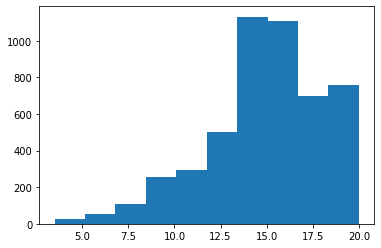

In [20]:
# plt.hist(Life_Happy, bins='auto')   # in this case the number of bins is calculated by the app

plt.hist(Life_Happy, bins=10) # bins can be an integer (# of equal bins)
                              # a sequence that defines edges
                              # or a string that identifies a mode (like 'auto')


### Add Life_Happy to the dataset - last column and print the shape of the dataset to check a new column was added.

In [21]:
dataf3 = pd.concat([dataf2, Life_Happy.rename('Life_Happy')], axis=1)
print(dataf3.shape)

(4932, 99)


### Drop Life Sat and Happy from the dataset because they've been combined into a single variable, Life_Happy.  Print the shape of the dataset and the first 5 rows.

In [22]:
dataf3.drop(columns=['Life_Sat', 'Happy'], inplace=True)
print(dataf3.shape)
print(dataf3.head())

(4932, 97)
   A_YEAR  B_COUNTRY   Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8  ...  Q199  Q200  \
0    2021        404  1.0  3.0  3.0  4.0  1.0  1.0  1.0  2.0  ...   4.0   2.0   
1    2021        404  1.0  2.0  1.0  4.0  1.0  1.0  1.0  1.0  ...   4.0   3.0   
2    2021        404  1.0  1.0  3.0  4.0  2.0  1.0  2.0  1.0  ...   3.0   2.0   
3    2021        404  1.0  2.0  3.0  4.0  1.0  2.0  2.0  1.0  ...   4.0   3.0   
4    2021        404  1.0  2.0  3.0  4.0  1.0  1.0  1.0  2.0  ...   4.0   3.0   

   Q201  Q202  Q203  Q204  Q205  Q206  Q207  Life_Happy  
0   3.0   1.0   1.0   1.0   4.0   1.0   1.0        10.0  
1   5.0   4.0   5.0   1.0   4.0   1.0   1.0        10.5  
2   1.0   1.0   2.0   1.0   2.0   1.0   3.0        15.0  
3   5.0   4.0   4.0   1.0   3.0   1.0   1.0        10.5  
4   4.0   1.0   2.0   1.0   5.0   2.0   1.0        15.0  

[5 rows x 97 columns]


In [23]:
print(dataf3.iloc[:,2:97].columns)

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q47', 'Q48', 'Q50', 'Q51', 'Q52', 'Q53',
       'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63',
       'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q69', 'Q70', 'Q71', 'Q72', 'Q73',
       'Q74', 'Q75', 'Q76', 'Q77', 'Q78', 'Q79', 'Q80', 'Q81', 'Q83', 'Q88',
       'Q195', 'Q196', 'Q197', 'Q198', 'Q199', 'Q200', 'Q201', 'Q202', 'Q203',
       'Q204', 'Q205', 'Q206', 'Q207', 'Life_Happy'],
      dtype='object')


In [24]:
# Return a list of column names

dataf3.columns.values.tolist()

['A_YEAR',
 'B_COUNTRY',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'Q29',
 'Q30',
 'Q31',
 'Q32',
 'Q33',
 'Q34',
 'Q35',
 'Q36',
 'Q37',
 'Q38',
 'Q39',
 'Q40',
 'Q41',
 'Q42',
 'Q43',
 'Q44',
 'Q45',
 'Q47',
 'Q48',
 'Q50',
 'Q51',
 'Q52',
 'Q53',
 'Q54',
 'Q55',
 'Q56',
 'Q57',
 'Q58',
 'Q59',
 'Q60',
 'Q61',
 'Q62',
 'Q63',
 'Q64',
 'Q65',
 'Q66',
 'Q67',
 'Q68',
 'Q69',
 'Q70',
 'Q71',
 'Q72',
 'Q73',
 'Q74',
 'Q75',
 'Q76',
 'Q77',
 'Q78',
 'Q79',
 'Q80',
 'Q81',
 'Q83',
 'Q88',
 'Q195',
 'Q196',
 'Q197',
 'Q198',
 'Q199',
 'Q200',
 'Q201',
 'Q202',
 'Q203',
 'Q204',
 'Q205',
 'Q206',
 'Q207',
 'Life_Happy']

## LEAST SQUARES MULTIPLE REGRESSION FULL SAMPLE

### Conduct ordinary least squares multiple regression with the dataset of 4933 rows and 95 columns, (94 features and Life_Happy as the target variable - DV).  We'll drop Year and Country from this analysis, columns 0 and 1.

In [25]:
X = dataf3.iloc[:, np.r_[2:96]]  ## columns run from 0 to 96, so there are 97 columns; drop first two and last
y = dataf3["Life_Happy"]

### Check X and y

In [26]:
print(X.shape)
print(y)

(4932, 94)
0       10.0
1       10.5
2       15.0
3       10.5
4       15.0
        ... 
4927    15.5
4928    16.5
4929    15.5
4930    16.5
4931    13.5
Name: Life_Happy, Length: 4932, dtype: float64


### Perform standard multiple regression using scikit learn.  Note:  R-square must be calcuated "by hand"

In [27]:
model = LinearRegression()

In [28]:
# fitting the model
model.fit(X,y)

LinearRegression()

In [29]:
# making predictions
predictions = model.predict(X)

In [30]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y, predictions))
print('mean_absolute_error : ', mean_absolute_error(y, predictions))

mean_squared_error :  6.343602837029014
mean_absolute_error :  1.9196802824629087


In [31]:
# compute with formulas from the theory

SS_Residual = sum((y-predictions)**2)       
SS_Total = sum((y-np.mean(y))**2)     

r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.400407824762819


### Create dataset of predicted and actual values.  First convert numpy array to dataframe, second rename the variable, and third combine the predicted and actual values into a dataframe.  Print shape and first few rows.

In [32]:
scatdf = pd.DataFrame(predictions)

scatdf = scatdf.rename({0:'Pred'}, axis=1)


### Using seaborn library, return scatterplot of predicted values (Pred) and actual values (Life_Happy)

<AxesSubplot:xlabel='Life_Happy', ylabel='Pred'>

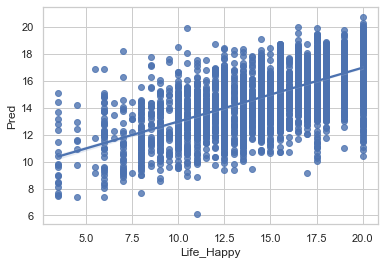

In [33]:
sns.set(style='whitegrid')

sns.regplot(x=y,  ## regplot returns the regression line whereas scatterplot does not
            y= scatdf['Pred'])

### Print the regression coefficient for each of the features.
### model.coef contains the list of regression coefficients & X.columns contains feature names.

In [34]:
coef_dict_linear = {}
for coef, feature in zip(model.coef_, X.columns): 
    coef_dict_linear[feature] = coef
coef_dict_linear

{'Q1': -0.10946210979696136,
 'Q2': -0.08991956641565707,
 'Q3': -0.052993150763919,
 'Q4': 0.051650928079223134,
 'Q5': -0.011608336048483714,
 'Q6': -0.19906457735827704,
 'Q7': 0.11448673608041418,
 'Q8': -0.15550322524715698,
 'Q9': 0.05830532513502167,
 'Q10': 0.025746543762181478,
 'Q11': 0.015400575849401243,
 'Q12': -0.054988252898542256,
 'Q13': 0.028530837568132076,
 'Q14': 0.10630472149858002,
 'Q15': -0.0373087568248454,
 'Q16': 0.03531259755926869,
 'Q17': -0.21455863203427653,
 'Q18': -0.002515993079084039,
 'Q19': -0.014789463417577892,
 'Q20': 0.018418058170340985,
 'Q21': -0.021599451177756215,
 'Q22': 0.2367262814736477,
 'Q23': -0.45952396651958805,
 'Q24': 0.23061470400319933,
 'Q25': 0.049112076816449114,
 'Q26': 0.20150921212497447,
 'Q27': -0.07493661412185976,
 'Q28': -0.08720411853910393,
 'Q29': 0.047778975322468276,
 'Q30': 0.03959357453834325,
 'Q31': 0.09244920920406102,
 'Q32': -0.0564641082934888,
 'Q33': -0.038514863634359436,
 'Q34': 0.05471712062833345

In [54]:
np.sum(abs(model.coef_))

9.072871773921035

## Basic Cross-Validation for Multiple Regression Full Sample

In [45]:
## Import library to split data into training and testing samples

from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
model = LinearRegression()

In [48]:
# fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [49]:
# making predictions
predictions = model.predict(X_test)

In [50]:
### Print the regression coefficient for each of the features.
### model.coef contains the list of regression coefficients & X.columns contains feature names.


print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  6.721932486394773
mean_absolute_error :  1.9387873880970714


### Compute R-square using the formula.

In [51]:

SS_Residual = sum((y_test-predictions)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     

r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.33293353441685936


### Print the regression coefficient for each of the features.
### model.coef contains the list of regression coefficients & X.columns contains feature names.

In [52]:
coef_dict_linear = {}
for coef, feature in zip(model.coef_, X.columns): 
    coef_dict_linear[feature] = coef
coef_dict_linear

{'Q1': -0.006184737364456179,
 'Q2': -0.08340684337951693,
 'Q3': -0.07285542652284663,
 'Q4': 0.11400012440819961,
 'Q5': 0.03839298877342293,
 'Q6': -0.22244204293127984,
 'Q7': 0.1448140185488111,
 'Q8': -0.17212321130605546,
 'Q9': 0.02721342398417692,
 'Q10': 0.044322398453417344,
 'Q11': 0.06458323633916256,
 'Q12': -0.017699672053471702,
 'Q13': -0.005101781990886687,
 'Q14': 0.10875650532237427,
 'Q15': -0.10079440346607302,
 'Q16': 0.02364511476962632,
 'Q17': -0.24526060562832583,
 'Q18': 0.058389035081799365,
 'Q19': 0.12325888679409103,
 'Q20': 0.022786841112755883,
 'Q21': 0.04907528713695404,
 'Q22': 0.3752628744443089,
 'Q23': -0.2506650909066135,
 'Q24': 0.29030038615544757,
 'Q25': -0.14928064326034798,
 'Q26': 0.069839926677281,
 'Q27': -0.1507804829626032,
 'Q28': -0.06822136246296108,
 'Q29': 0.04487293857760137,
 'Q30': -0.0024316530567140143,
 'Q31': 0.11703219245160441,
 'Q32': 0.02866855315701977,
 'Q33': -0.039261417789671654,
 'Q34': 0.08916319474692302,
 'Q35

In [53]:
np.sum(abs(model.coef_))

9.072871773921035

## LEAST SQUARES REGRESSION SMALL SAMPLE

## Select a random sample of rows (n=1000) for the regularized regression examples.

In [91]:
s1000 = dataf3.sample(n = 1000)
print(s1000.shape)

(1000, 97)


In [92]:
X = s1000.iloc[:, np.r_[2:96]]
y = s1000["Life_Happy"]

### Check X and y

In [93]:
print(X.shape)
print(type(y))
print(y)

(1000, 94)
<class 'pandas.core.series.Series'>
1714    18.0
4528    20.0
826     11.0
3565    18.0
4919     8.0
        ... 
1521    20.0
2048    17.0
2679    13.5
3545    16.5
1654    15.5
Name: Life_Happy, Length: 1000, dtype: float64


### Perform standard multiple regression using scikit learn.  Note:  R-square must be calcuated "by hand"

In [94]:
model = LinearRegression(normalize=True)

In [95]:
# fitting the model
model.fit(X,y)

LinearRegression(normalize=True)

In [96]:
# making predictions
predictions = model.predict(X)

In [97]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y, predictions))
print('mean_absolute_error : ', mean_absolute_error(y, predictions))

mean_squared_error :  6.012610406862995
mean_absolute_error :  1.8899798705430153


### Compute R-square using the formula and print.  Notice the larger R-square value compared to the full dataset.  This represents overfitting.

In [98]:
SS_Residual = sum((y-predictions)**2)       
SS_Total = sum((y-np.mean(y))**2)     

r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.45637372746429217


### Convert predictions, a numpy array, to a dataframe, scatdf, then rename the variable in the dataframe from 0 to Pred.

In [99]:
scatdf = pd.DataFrame(predictions)

scatdf = scatdf.rename({0:'Pred'}, axis=1)

### Using seaborn library, return scatterplot of predicted values (Pred) and actual values (Life_Happy)

<AxesSubplot:xlabel='Life_Happy', ylabel='Pred'>

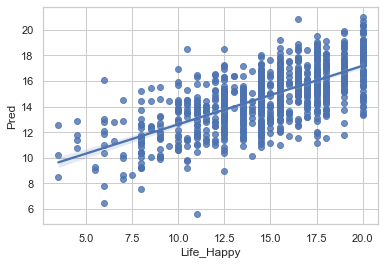

In [100]:
sns.set(style='whitegrid')

sns.regplot(x = y,  ## regplot returns the regression line whereas scatterplot does not
            y = scatdf['Pred'])

### Print the regression coefficient for each of the features.
### model.coef contains the list of regression coefficients & X.columns contains feature names.

In [65]:
coef_dict_linear = {}
for coef, feature in zip(model.coef_, X.columns): 
    coef_dict_linear[feature] = coef
coef_dict_linear

{'Q1': 0.0030825000936658456,
 'Q2': 0.015452476654372929,
 'Q3': -0.05669828532606357,
 'Q4': -0.15190146086818582,
 'Q5': 0.06424639283555117,
 'Q6': -0.25210378486610985,
 'Q7': -0.22472953787349378,
 'Q8': 0.28306191176222945,
 'Q9': 0.32636973407051634,
 'Q10': 0.1256002081388037,
 'Q11': -0.0929650517845092,
 'Q12': 0.09800312160761433,
 'Q13': -0.05527614105779879,
 'Q14': -0.042999261602338655,
 'Q15': 0.05631516936489895,
 'Q16': 0.13265135690410068,
 'Q17': -0.44524354185498044,
 'Q18': -0.34392049769724714,
 'Q19': -0.5412104878710177,
 'Q20': 0.8130938788140747,
 'Q21': 0.5343065083614491,
 'Q22': -0.1505397478462589,
 'Q23': -1.3899161262330164,
 'Q24': 0.6279336940556638,
 'Q25': 0.5657419851398137,
 'Q26': 0.041011668847994745,
 'Q27': -0.08589960398534834,
 'Q28': 0.023742280083539433,
 'Q29': 0.41793079523682014,
 'Q30': -0.035500467618938096,
 'Q31': -0.015906251060387094,
 'Q32': -0.03396741340130895,
 'Q33': -0.2317286350435828,
 'Q34': 0.020079482731004576,
 'Q35':

In [101]:
np.sum(abs(model.coef_))

13.23927409559734

# RIDGE REGRESSION
### alpha - a float, default=1.0.  Alpha is a weight that controls the regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the regression estimates. Larger values create stronger regularization.
### solver - chooses the loss function based upon the data type (e.g., least squares for continuous DV)
### tol - Precision of the solution.  That is, set the how small the gradient can be before concluding that the optimal solution has been achieved.
### max_iter = select the maximum number of iterations calculating the gradient before concluding that the optimal solution has been achieved.  You might have to set the ‘max_iter’ parameter if a warning appears saying that the gradient descent algorithm stopped before convergence.
### normalize - set equal to True or False depending upon whether or not you want to normalize the features.  It's generally a good idea to normalize the features.

In [67]:
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

### Optimizes  RSS (Residual Sum of Squares) + αlpha * (sum of squared regression coefficients)
### Where α (alpha) defines the impact of the regularizer.  If alpha = 0, the Ridge regression becomes OLS.

In [102]:
## Specify the ridge regression model

r_reg = Ridge(alpha=10, tol = .001, normalize=True)

In [103]:
# fitting the model
r_reg.fit(X, y)

Ridge(alpha=10, normalize=True)

In [104]:
# making predictions
predictions = r_reg.predict(X)

In [105]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y, predictions))
print('mean_absolute_error : ', mean_absolute_error(y, predictions))

mean_squared_error :  9.363138106969041
mean_absolute_error :  2.3653541255180572


### Compute R-square using the formula and print.   When the penalty is large, alpha = 10, the R-square is reduced.

In [106]:
SS_Residual = sum((y-predictions)**2)       
SS_Total = sum((y-np.mean(y))**2)     

r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.15343793728616162


### Convert predictions, a numpy array, to a dataframe, scatdf, then rename the variable in the dataframe from 0 to Pred.

In [107]:
scatdf = pd.DataFrame(predictions)

scatdf = scatdf.rename({0:'Pred'}, axis=1)

### Using seaborn library, return scatterplot of predicted values (Pred) and actual values (Life_Happy)

<AxesSubplot:xlabel='Life_Happy', ylabel='Pred'>

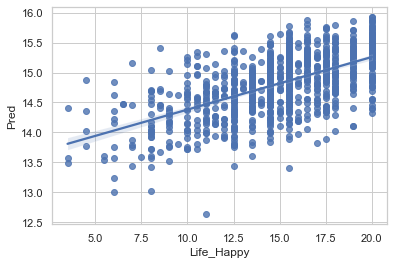

In [108]:
sns.set(style='whitegrid')

sns.regplot(x = y,  ## regplot returns the regression line whereas scatterplot does not
            y = scatdf['Pred'])

## What is the optimal value of alpha?
### Use grid search and cross validation to find the optimal value for alpha.

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [110]:
## Specify the model without alpha parameter because the grid search will find the best one.

r_reg = Ridge(normalize=True)  ## Normalize all the variables

In [111]:
## Specify the model hyperparameter alpha

search = GridSearchCV(estimator = r_reg, param_grid = {
                      'alpha' : np.logspace(-6, 6, 13)},
                      scoring = ['neg_mean_squared_error', 'r2'],
                      refit = 'r2',
                      cv = 5,
                      verbose = 4)

In [112]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] alpha=1e-06 .....................................................
[CV]  alpha=1e-06, neg_mean_squared_error=-8.934, r2=0.191, total=   0.0s
[CV] alpha=1e-06 .....................................................
[CV]  alpha=1e-06, neg_mean_squared_error=-8.550, r2=0.087, total=   0.0s
[CV] alpha=1e-06 .....................................................
[CV]  alpha=1e-06, neg_mean_squared_error=-7.690, r2=0.240, total=   0.0s
[CV] alpha=1e-06 .....................................................
[CV]  alpha=1e-06, neg_mean_squared_error=-7.455, r2=0.379, total=   0.0s
[CV] alpha=1e-06 .....................................................
[CV]  alpha=1e-06, neg_mean_squared_error=-7.041, r2=0.434, total=   0.0s
[CV] alpha=1e-05 .....................................................
[CV]  alpha=1e-05, neg_mean_squared_error=-8.934, r2=0.191, total=   0.0s
[CV] alpha=1e-05 ....................................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha=0.1, neg_mean_squared_error=-6.981, r2=0.439, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV]  alpha=1.0, neg_mean_squared_error=-7.894, r2=0.285, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV]  alpha=1.0, neg_mean_squared_error=-7.347, r2=0.215, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV]  alpha=1.0, neg_mean_squared_error=-6.839, r2=0.324, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV]  alpha=1.0, neg_mean_squared_error=-7.494, r2=0.376, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV]  alpha=1.0, neg_mean_squared_error=-7.709, r2=0.380, total=   0.0s
[CV] alpha=10.0 ......................................................
[CV]  alpha=10.0, neg_mean_squared_error=-9.664, r2=0.125, total=   0.0s
[CV] alpha=10.0 .....................................................

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Ridge(normalize=True),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'], verbose=4)

In [113]:
## Print best results

print(search.best_estimator_)
print(search.best_params_)
print(abs(search.best_score_))

Ridge(normalize=True)
{'alpha': 1.0}
0.3161154440946833


In [114]:
r_reg = Ridge(alpha = 1, tol = .001, normalize=True)
r_reg.fit(X_test, y_test)

Ridge(alpha=1, normalize=True)

In [115]:
# Make predictions using the test dataset

predictions = r_reg.predict(X_test)

In [116]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  5.927526214784771
mean_absolute_error :  1.8958196341740343


### Compute R-square using the formula and print. 

In [117]:
SS_Residual = sum((y_test-predictions)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     

r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.4704270496391443


In [118]:
coef_dict_ridge = {}
for coef, feature in zip(r_reg.coef_, X.columns): 
    coef_dict_ridge[feature] = coef
coef_dict_ridge

{'Q1': 0.08439932616704005,
 'Q2': -0.08089373143109958,
 'Q3': 0.0011887647987163547,
 'Q4': 0.06190333432419784,
 'Q5': -0.10407201709599379,
 'Q6': -0.22773911661736682,
 'Q7': 0.023272561600415013,
 'Q8': -0.09231430813450558,
 'Q9': -0.08811982469288705,
 'Q10': 0.052226859166864335,
 'Q11': 0.32676809338233126,
 'Q12': -0.17916891947712263,
 'Q13': -0.034137364609560204,
 'Q14': 0.2943608648926368,
 'Q15': -0.11870067199564421,
 'Q16': 0.11626969828016077,
 'Q17': -0.19718203782622223,
 'Q18': -0.11540448572197722,
 'Q19': 0.41667197267998873,
 'Q20': -0.002204214051442423,
 'Q21': 0.1950739187961698,
 'Q22': 0.1442303373696331,
 'Q23': -0.4909796440485106,
 'Q24': 0.039371927650093355,
 'Q25': -0.097717282083464,
 'Q26': -0.18608881644659112,
 'Q27': -0.09081406312289551,
 'Q28': -0.126923380505819,
 'Q29': 0.06007152585844778,
 'Q30': -0.0019596429653775376,
 'Q31': 0.12444299447096951,
 'Q32': -0.012165978756948583,
 'Q33': 0.10774094948393287,
 'Q34': 0.1868913075532859,
 'Q3

In [119]:
np.sum(abs(r_reg.coef_))

9.681040957378183

# Lasso

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [120]:
## Specify the model

l_reg = Lasso(normalize=True)

In [121]:
## Specify the model hyperparameter alpha

search = GridSearchCV(estimator = l_reg, param_grid = {
                      'alpha' : np.logspace(-6, 6, 13)},
                      scoring = ['neg_mean_squared_error', 'r2'],
                      refit = 'r2',
                      cv = 5,
                      verbose = 4)

In [122]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] alpha=1e-06 .....................................................
[CV]  alpha=1e-06, neg_mean_squared_error=-8.933, r2=0.191, total=   0.0s
[CV] alpha=1e-06 .....................................................
[CV]  alpha=1e-06, neg_mean_squared_error=-8.549, r2=0.087, total=   0.0s
[CV] alpha=1e-06 .....................................................
[CV]  alpha=1e-06, neg_mean_squared_error=-7.689, r2=0.240, total=   0.0s
[CV] alpha=1e-06 .....................................................
[CV]  alpha=1e-06, neg_mean_squared_error=-7.454, r2=0.379, total=   0.0s
[CV] alpha=1e-06 .....................................................
[CV]  alpha=1e-06, neg_mean_squared_error=-7.041, r2=0.434, total=   0.0s
[CV] alpha=1e-05 .....................................................
[CV]  alpha=1e-05, neg_mean_squared_error=-8.923, r2=0.192, total=   0.0s
[CV] alpha=1e-05 ....................................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha=0.1, neg_mean_squared_error=-11.041, r2=-0.000, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV]  alpha=0.1, neg_mean_squared_error=-9.362, r2=-0.000, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV]  alpha=0.1, neg_mean_squared_error=-10.125, r2=-0.001, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV]  alpha=0.1, neg_mean_squared_error=-12.012, r2=-0.000, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV]  alpha=0.1, neg_mean_squared_error=-12.446, r2=-0.000, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV]  alpha=1.0, neg_mean_squared_error=-11.041, r2=-0.000, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV]  alpha=1.0, neg_mean_squared_error=-9.362, r2=-0.000, total=   0.0s
[CV] alpha=1.0 ...........................................

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'], verbose=4)

In [123]:
## Print best results

print(search.best_estimator_)
print(search.best_params_)
print(abs(search.best_score_))

Lasso(alpha=0.01, normalize=True)
{'alpha': 0.01}
0.3552620142339327


In [124]:
l_reg = Lasso(alpha = .01, tol = .001, normalize=True)
l_reg.fit(X_test, y_test)

Lasso(alpha=0.01, normalize=True, tol=0.001)

In [125]:
# Make predictions using the test dataset

predictions = l_reg.predict(X_test)

In [126]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  6.021535586173164
mean_absolute_error :  1.9387669970849577


### Compute R-square using the formula and print. 

In [127]:
SS_Residual = sum((y_test-predictions)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     

r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.4620281293537227


### Convert predictions, a numpy array, to a dataframe, scatdf, then rename the variable in the dataframe from 0 to Pred.

In [ ]:
scatdf = pd.DataFrame(predictions)

scatdf = scatdf.rename({0:'Pred'}, axis=1)

### Using seaborn library, return scatterplot of predicted values (Pred) and actual values (Life_Happy)

<AxesSubplot:xlabel='Life_Happy', ylabel='Pred'>

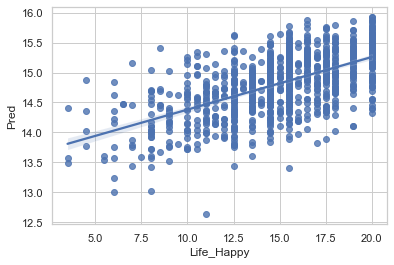

In [128]:
sns.set(style='whitegrid')

sns.regplot(x = y,  ## regplot returns the regression line whereas scatterplot does not
            y = scatdf['Pred'])

In [129]:
np.sum(abs(l_reg.coef_))

3.9410319294312983

In [130]:
coef_dict_lasso = {}
for coef, feature in zip(l_reg.coef_, X.columns): 
    coef_dict_lasso[feature] = coef
coef_dict_lasso

{'Q1': 0.0,
 'Q2': -0.0,
 'Q3': 0.0,
 'Q4': 0.0,
 'Q5': -0.0,
 'Q6': -0.3641788205527157,
 'Q7': -0.0,
 'Q8': -0.0,
 'Q9': -0.0,
 'Q10': 0.0,
 'Q11': 0.2745947329398475,
 'Q12': -0.0,
 'Q13': 0.0,
 'Q14': 0.3526981896515897,
 'Q15': -0.0,
 'Q16': 0.0,
 'Q17': -0.0,
 'Q18': -0.03662965331587076,
 'Q19': 0.0,
 'Q20': -0.0,
 'Q21': 0.0,
 'Q22': 0.0,
 'Q23': -0.0,
 'Q24': -0.0,
 'Q25': -0.0,
 'Q26': -0.0,
 'Q27': -0.0,
 'Q28': -0.0,
 'Q29': 0.0,
 'Q30': 0.0,
 'Q31': 0.10728989291174407,
 'Q32': -0.0,
 'Q33': 0.07414214093847911,
 'Q34': 0.20292059660999395,
 'Q35': 0.0,
 'Q36': -0.030684662246973225,
 'Q37': 0.0,
 'Q38': 0.0,
 'Q39': 0.12752824160904042,
 'Q40': 0.0,
 'Q41': -0.0,
 'Q42': 0.0,
 'Q43': 0.04638546955267123,
 'Q44': 0.05182290031766459,
 'Q45': -0.0,
 'Q47': -0.33590409530865983,
 'Q48': 0.2827395340273111,
 'Q50': 0.453174682991029,
 'Q51': 0.0,
 'Q52': -0.0,
 'Q53': 0.02301070855446296,
 'Q54': -0.0,
 'Q55': 0.0,
 'Q56': -0.003822703944253335,
 'Q57': 0.0,
 'Q58': -0.241574

# Elastic Net

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [133]:
enet_reg = ElasticNet(normalize=True)

In [135]:
## Specify the model hyperparameter alpha

search = GridSearchCV(estimator = enet_reg, param_grid = {
                      'alpha' : np.logspace(-6, 6, 13),
                      'l1_ratio' : (.2, .4, .5, .6, .8)},
                      scoring = ['neg_mean_squared_error', 'r2'],
                      refit = 'r2',
                      cv = 5,
                      verbose = 4)

In [136]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 65 candidates, totalling 325 fits
[CV] alpha=1e-06, l1_ratio=0.2 .......................................
[CV]  alpha=1e-06, l1_ratio=0.2, neg_mean_squared_error=-8.929, r2=0.191, total=   0.0s
[CV] alpha=1e-06, l1_ratio=0.2 .......................................
[CV]  alpha=1e-06, l1_ratio=0.2, neg_mean_squared_error=-8.546, r2=0.087, total=   0.0s
[CV] alpha=1e-06, l1_ratio=0.2 .......................................
[CV]  alpha=1e-06, l1_ratio=0.2, neg_mean_squared_error=-7.687, r2=0.240, total=   0.0s
[CV] alpha=1e-06, l1_ratio=0.2 .......................................
[CV]  alpha=1e-06, l1_ratio=0.2, neg_mean_squared_error=-7.453, r2=0.379, total=   0.0s
[CV] alpha=1e-06, l1_ratio=0.2 .......................................
[CV]  alpha=1e-06, l1_ratio=0.2, neg_mean_squared_error=-7.041, r2=0.434, total=   0.0s
[CV] alpha=1e-06, l1_ratio=0.4 .......................................
[CV]  alpha=1e-06, l1_ratio=0.4, neg_mean_squared_error=-8.930, r2=0.191

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=1e-06, l1_ratio=0.8 .......................................
[CV]  alpha=1e-06, l1_ratio=0.8, neg_mean_squared_error=-7.689, r2=0.240, total=   0.0s
[CV] alpha=1e-06, l1_ratio=0.8 .......................................
[CV]  alpha=1e-06, l1_ratio=0.8, neg_mean_squared_error=-7.454, r2=0.379, total=   0.0s
[CV] alpha=1e-06, l1_ratio=0.8 .......................................
[CV]  alpha=1e-06, l1_ratio=0.8, neg_mean_squared_error=-7.041, r2=0.434, total=   0.0s
[CV] alpha=1e-05, l1_ratio=0.2 .......................................
[CV]  alpha=1e-05, l1_ratio=0.2, neg_mean_squared_error=-8.887, r2=0.195, total=   0.0s
[CV] alpha=1e-05, l1_ratio=0.2 .......................................
[CV]  alpha=1e-05, l1_ratio=0.2, neg_mean_squared_error=-8.511, r2=0.091, total=   0.0s
[CV] alpha=1e-05, l1_ratio=0.2 .......................................
[CV]  alpha=1e-05, l1_ratio=0.2, neg_mean_squared_error=-7.663, r2=0.243, total=   0.0s
[CV] alpha=1e-05, l1_ratio=0.2 ..............

[CV]  alpha=0.001, l1_ratio=0.8, neg_mean_squared_error=-6.792, r2=0.454, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.2 ........................................
[CV]  alpha=0.01, l1_ratio=0.2, neg_mean_squared_error=-9.012, r2=0.184, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.2 ........................................
[CV]  alpha=0.01, l1_ratio=0.2, neg_mean_squared_error=-7.950, r2=0.151, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.2 ........................................
[CV]  alpha=0.01, l1_ratio=0.2, neg_mean_squared_error=-7.938, r2=0.215, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.2 ........................................
[CV]  alpha=0.01, l1_ratio=0.2, neg_mean_squared_error=-9.269, r2=0.228, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.2 ........................................
[CV]  alpha=0.01, l1_ratio=0.2, neg_mean_squared_error=-9.640, r2=0.225, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.4 ........................................
[CV]  alpha=0.01, l1_ratio=0.4, neg_mean_squared_er

[CV]  alpha=1.0, l1_ratio=0.4, neg_mean_squared_error=-9.362, r2=-0.000, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.4 .........................................
[CV]  alpha=1.0, l1_ratio=0.4, neg_mean_squared_error=-10.125, r2=-0.001, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.4 .........................................
[CV]  alpha=1.0, l1_ratio=0.4, neg_mean_squared_error=-12.012, r2=-0.000, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.4 .........................................
[CV]  alpha=1.0, l1_ratio=0.4, neg_mean_squared_error=-12.446, r2=-0.000, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.5 .........................................
[CV]  alpha=1.0, l1_ratio=0.5, neg_mean_squared_error=-11.041, r2=-0.000, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.5 .........................................
[CV]  alpha=1.0, l1_ratio=0.5, neg_mean_squared_error=-9.362, r2=-0.000, total=   0.0s
[CV] alpha=1.0, l1_ratio=0.5 .........................................
[CV]  alpha=1.0, l1_ratio=0.5, neg_mean_squared_

[CV]  alpha=100.0, l1_ratio=0.6, neg_mean_squared_error=-9.362, r2=-0.000, total=   0.0s
[CV] alpha=100.0, l1_ratio=0.6 .......................................
[CV]  alpha=100.0, l1_ratio=0.6, neg_mean_squared_error=-10.125, r2=-0.001, total=   0.0s
[CV] alpha=100.0, l1_ratio=0.6 .......................................
[CV]  alpha=100.0, l1_ratio=0.6, neg_mean_squared_error=-12.012, r2=-0.000, total=   0.0s
[CV] alpha=100.0, l1_ratio=0.6 .......................................
[CV]  alpha=100.0, l1_ratio=0.6, neg_mean_squared_error=-12.446, r2=-0.000, total=   0.0s
[CV] alpha=100.0, l1_ratio=0.8 .......................................
[CV]  alpha=100.0, l1_ratio=0.8, neg_mean_squared_error=-11.041, r2=-0.000, total=   0.0s
[CV] alpha=100.0, l1_ratio=0.8 .......................................
[CV]  alpha=100.0, l1_ratio=0.8, neg_mean_squared_error=-9.362, r2=-0.000, total=   0.0s
[CV] alpha=100.0, l1_ratio=0.8 .......................................
[CV]  alpha=100.0, l1_ratio=0.8, neg

[CV]  alpha=10000.0, l1_ratio=0.8, neg_mean_squared_error=-12.446, r2=-0.000, total=   0.0s
[CV] alpha=100000.0, l1_ratio=0.2 ....................................
[CV]  alpha=100000.0, l1_ratio=0.2, neg_mean_squared_error=-11.041, r2=-0.000, total=   0.0s
[CV] alpha=100000.0, l1_ratio=0.2 ....................................
[CV]  alpha=100000.0, l1_ratio=0.2, neg_mean_squared_error=-9.362, r2=-0.000, total=   0.0s
[CV] alpha=100000.0, l1_ratio=0.2 ....................................
[CV]  alpha=100000.0, l1_ratio=0.2, neg_mean_squared_error=-10.125, r2=-0.001, total=   0.0s
[CV] alpha=100000.0, l1_ratio=0.2 ....................................
[CV]  alpha=100000.0, l1_ratio=0.2, neg_mean_squared_error=-12.012, r2=-0.000, total=   0.0s
[CV] alpha=100000.0, l1_ratio=0.2 ....................................
[CV]  alpha=100000.0, l1_ratio=0.2, neg_mean_squared_error=-12.446, r2=-0.000, total=   0.0s
[CV] alpha=100000.0, l1_ratio=0.4 ....................................
[CV]  alpha=100000

[Parallel(n_jobs=1)]: Done 325 out of 325 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=ElasticNet(normalize=True),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
                         'l1_ratio': (0.2, 0.4, 0.5, 0.6, 0.8)},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'], verbose=4)

In [137]:
## Print best results

print(search.best_estimator_)
print(search.best_params_)
print(abs(search.best_score_))

ElasticNet(alpha=0.001, normalize=True)
{'alpha': 0.001, 'l1_ratio': 0.5}
0.3329333291564055


In [138]:
enet_reg = ElasticNet(alpha = .001, tol = .001, l1_ratio = .5, normalize=True)
enet_reg.fit(X_test, y_test)

ElasticNet(alpha=0.001, normalize=True, tol=0.001)

In [139]:
# Make predictions using the test dataset

predictions = enet_reg.predict(X_test)

In [140]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  4.910501922098042
mean_absolute_error :  1.7442362055425162


### Compute R-square using the formula and print.  Notice the large R-square value.  This represents overfitting.

In [141]:

SS_Residual = sum((y_test-predictions)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     

r_squared = 1 - (float(SS_Residual))/SS_Total

print(r_squared)

0.5612893310953434


### Convert predictions, a numpy array, to a dataframe, scatdf, then rename the variable in the dataframe from 0 to Pred.

In [142]:
scatdf = pd.DataFrame(predictions)

scatdf = scatdf.rename({0:'Pred'}, axis=1)

### Using seaborn library, return scatterplot of predicted values (Pred) and actual values (Life_Happy)

<AxesSubplot:xlabel='Life_Happy', ylabel='Pred'>

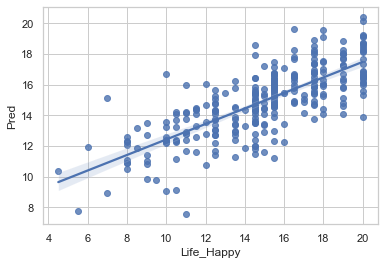

In [143]:
sns.set(style='whitegrid')

sns.regplot(x = y_test,  ## regplot returns the regression line whereas scatterplot does not
            y = scatdf['Pred'])

In [144]:
coef_dict_enet = {}
for coef, feature in zip(enet_reg.coef_, X.columns): 
    coef_dict_enet[feature] = coef
coef_dict_enet

{'Q1': 0.21899061954997234,
 'Q2': -0.09020217997293356,
 'Q3': 0.036666051884241366,
 'Q4': 0.14318491784016477,
 'Q5': -0.2362655085034383,
 'Q6': -0.4310753036641148,
 'Q7': 0.09741719489611643,
 'Q8': -0.11496695232031619,
 'Q9': -0.17833910888812537,
 'Q10': 0.12970880393583548,
 'Q11': 0.49831366725188403,
 'Q12': -0.24551532720813235,
 'Q13': -0.0,
 'Q14': 0.45816188754500486,
 'Q15': 0.01001916440778898,
 'Q16': 0.34107846769320066,
 'Q17': -0.10291921252458909,
 'Q18': -0.33372108582098986,
 'Q19': 0.9444213651324005,
 'Q20': 0.0,
 'Q21': 0.36747592689676345,
 'Q22': 0.02160090082339497,
 'Q23': -0.8630622326324655,
 'Q24': -0.0271298941197591,
 'Q25': -0.02994996062762831,
 'Q26': -0.3337554750588824,
 'Q27': -0.09233039548860689,
 'Q28': -0.2369806729040335,
 'Q29': 0.011789566635325871,
 'Q30': -0.015652897117368975,
 'Q31': 0.23747527348147354,
 'Q32': 0.024152657313356037,
 'Q33': 0.16199834540813357,
 'Q34': 0.30517264572082464,
 'Q35': 0.10706253086854502,
 'Q36': -0.22

# Ridge results

In [146]:
alpha = [1e-2, 1, 5, 10, 20, 100, 1000, 10000, 100000, 1e10, 1e12]

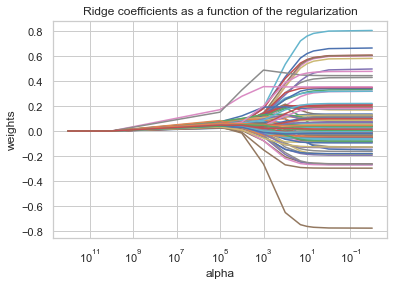

<Figure size 576x576 with 0 Axes>

In [147]:

coefs = []
for a in alpha:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Display results

ax = plt.gca()

ax.plot(alpha, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

# changing the size of figure
plt.figure(figsize=(8, 8))

plt.show()

In [ ]:
import sklearn.metrics

### max_error - calculates the maximum residual error for any single prediction and its true score.
### mean_squared_error - the average of the absolute values of the residuals (L1 norm).
### median_absolute_error - the median of the absolute values of the residuals.

In [ ]:
sklearn.metrics.max_error(y, r_reg.predict(X))

In [ ]:
sklearn.metrics.mean_squared_error(y, r_reg.predict(X))

In [ ]:
sklearn.metrics.median_absolute_error(y, r_reg.predict(X))